In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv', sep=',')

In [6]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [13]:
user_data.shape

(2954, 3)

In [15]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [20]:
#выяснить есть ли пропущенные значения

user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [21]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [55]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv', sep=',')

In [9]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [11]:
#Сколько уникальных значений принимает переменная platform?

logs.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

In [22]:
logs.shape

(4500, 4)

In [23]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [24]:
#выяснить есть ли пропущенные значения

logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [25]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [35]:
#Если несколько пользователей совершили одинаковое число успешных действий, перечислите их 
#идентификаторы (client) через запятую и пробел в порядке возрастания.

success_number = logs.query('success == True')\
    .groupby('client', as_index = False)\
    .agg({'platform' : 'count'})\
    .rename(columns = {'platform' : 'success_number'})\
    .sort_values('success_number', ascending = False)

In [37]:
maximum_success = success_number.success_number.max()

In [38]:
maximum_success

41

In [40]:
success_number.query('success_number == @maximum_success')

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41


In [45]:
successful_clients = success_number.query('success_number == @maximum_success')\
                .sort_values('client')\
                .client\
                .tolist()

In [46]:
successful_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [47]:
for client in successful_clients:
    print(client, end =', ')

12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584, 

In [48]:
', '.join([str(client) for client in successful_clients])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [59]:
#Если несколько пользователей совершили одинаковое число успешных действий, перечислите их 
#идентификаторы (client) через запятую и пробел в порядке возрастания.

success_number_2 = logs\
    .groupby('client', as_index = False)\
    .agg({'success' : 'sum'})\
    .rename(columns = {'success' : 'success_number'})\
    .sort_values('success_number', ascending = False)

In [61]:
success_number_2.head()

,client,success_number
3300,82563,41.0
1426,36165,41.0
2095,52870,41.0
468,12179,41.0
2469,61473,41.0


In [62]:
successful_clients_2 = success_number.query('success_number == @maximum_success')\
                .sort_values('client')\
                .client\
                .tolist()

In [63]:
maximum_success = success_number_2.success_number.max()

In [64]:
maximum_success

41.0

In [65]:
successful_clients_2

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [66]:
successful_clients == successful_clients_2

True

In [69]:
#С какой платформы осуществляется наибольшее количество успешных операций?
logs.query('success == True').platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

In [70]:
logs.query('success == True').platform.value_counts().idxmax()

'phone'

In [71]:
#Какую платформу предпочитают премиумные клиенты?

data = user_data.merge(logs)

In [72]:
data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [74]:
data.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

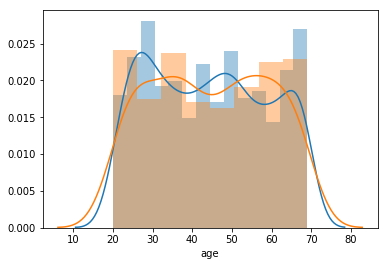

In [78]:
#Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет),
#используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?
#Используйте датасэт, который вы получили на предыдущем шаге

sns.distplot(data.query('premium == False').age)
sns.distplot(data.query('premium == True').age)

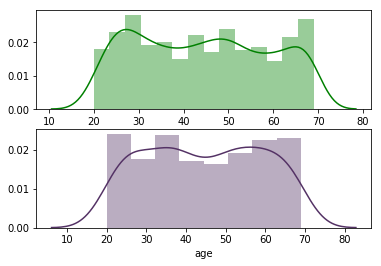

In [83]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)
sns.distplot(data.query('premium == False').age, ax = ax[0], color = 'green')
sns.distplot(data.query('premium == True').age, ax = ax[1], color = '#543265')

In [96]:
#Постройте график распределения числа успешных операций: 
#x – число успешных операций
#y – число клиентов, совершивших столько успешных операций
#Подсказки
#Выберите подходящие утверждения:

clienttt = data.groupby('client', as_index = False)\
    .agg({'success' : 'sum'})

In [92]:
clienttt

,client,success
0,40,1.0
1,75,1.0
2,81,1.0
3,132,1.0
4,164,1.0
5,278,1.0
6,316,1.0
7,328,0.0
8,340,0.0
9,360,0.0


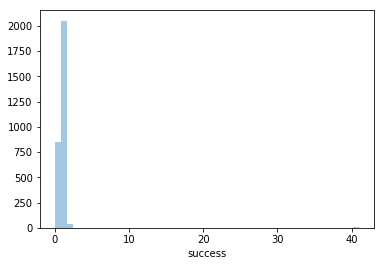

In [94]:
sns.distplot(clienttt.success, kde = False)

In [95]:
clienttt.success.value_counts()

1.0     2051
0.0      850
2.0       42
41.0       9
3.0        1
40.0       1
Name: success, dtype: int64

In [101]:
#Постройте график распределения числа успешных операций: 
#x – число успешных операций
#y – число клиентов, совершивших столько успешных операций

age_vs_success_number = data.query('platform == "computer"')\
    .groupby('age', as_index = False)\
    .agg({'success' : 'sum'})

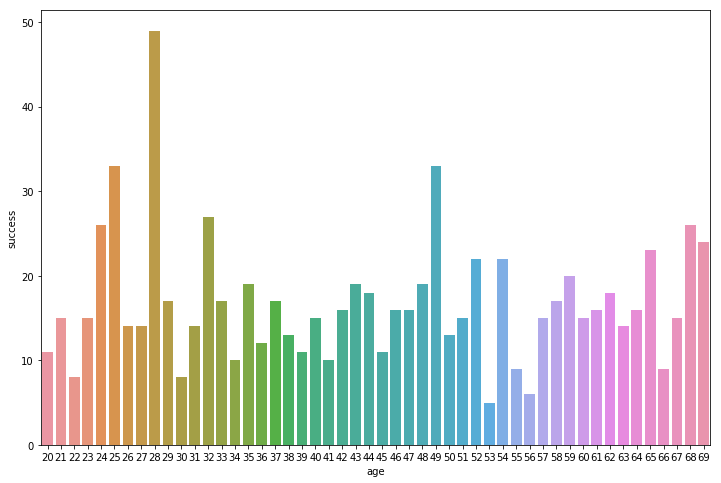

In [104]:
plt.figure(figsize=(12,8))
sns.barplot(x = age_vs_success_number.age, y = age_vs_success_number.success)

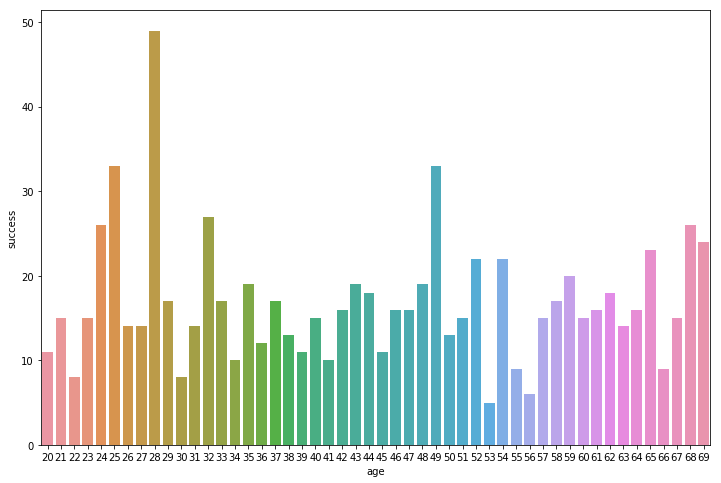

In [106]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'age', y = 'success', data = age_vs_success_number)

In [111]:
computer_success = data.query('platform == "computer" and success == True')

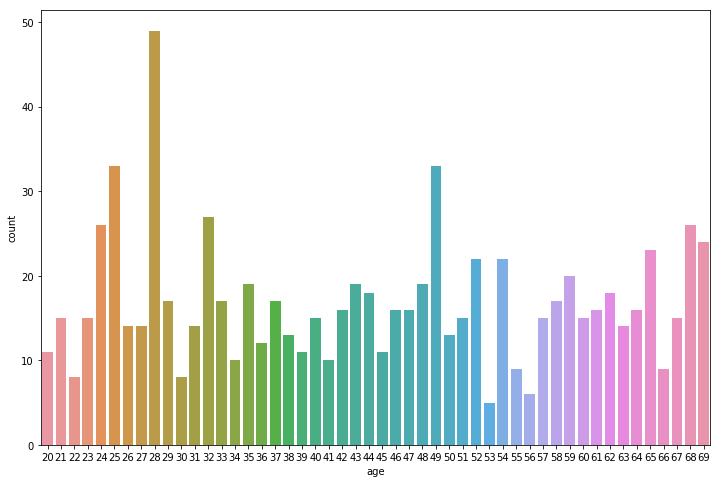

In [113]:
plt.figure(figsize=(12,8))
sns.countplot(computer_success.age)